In [1]:
import numpy as np
import matplotlib.pyplot as plt
import usphere_utils as uu

In [2]:
hidat = np.loadtxt("elec_stopping_power/electron_stopping_high_eng.txt", skiprows=1)
lodat = np.loadtxt("elec_stopping_power/electron_stopping_low_eng.txt", skiprows=1, delimiter=",")

hidat[:,0] = hidat[:,0]*1e6 ## now in eV

In [3]:
## return an interpolation over the full region
gpts = hidat[:,0] > 1e5
tot_dat = np.vstack( (lodat, hidat[gpts,:]) )

ev_per_nm  = 0.1 #convert MeV/cm to eV/nm

def elec_stopping_power(keng):
    return np.interp(keng, tot_dat[:,0], tot_dat[:,1]) * uu.rho/1e3 * ev_per_nm ## rho in g/cm^3

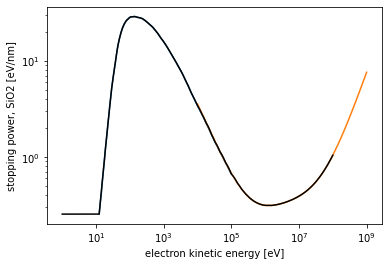

In [4]:
evec = np.logspace(0,8,10000)

plt.figure()
plt.loglog(lodat[:,0], lodat[:,1]*uu.rho/1e3*ev_per_nm)
plt.loglog(hidat[:,0], hidat[:,1]*uu.rho/1e3*ev_per_nm)
plt.loglog(evec, elec_stopping_power(evec), 'k')

plt.xlabel("electron kinetic energy [eV]")
plt.ylabel("stopping power, SiO2 [eV/nm]")

np.savez("elec_stopping_power/elec_stopping_sio2.npz", e=evec, s=elec_stopping_power(evec))

plt.show()